checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties       

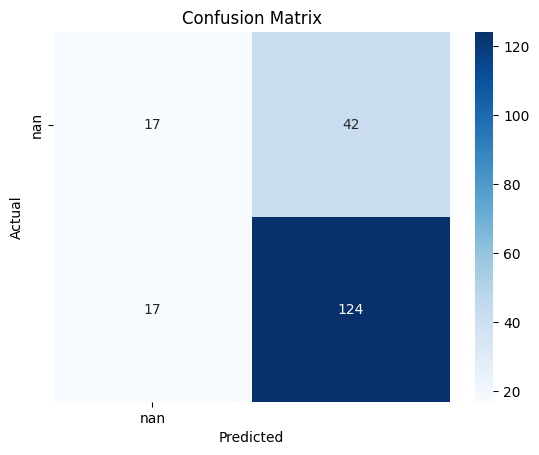

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.22      0.32        59
           1       0.74      0.93      0.82       141

    accuracy                           0.72       200
   macro avg       0.65      0.57      0.57       200
weighted avg       0.69      0.72      0.67       200



['credit_model.pkl']

In [33]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the ARFF file
data, meta = arff.loadarff('C:/Users/ADMIN/Downloads/dataset_31_credit-g.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
df.head()

# Step 1: Check the data types of the columns
print(df.dtypes)

# Step 2: Handle any categorical columns:
label_encoder = LabelEncoder()

# Encode the target column 'class'
df['class'] = label_encoder.fit_transform(df['class'])

# Step 3: Check for any missing data and handle it
print(df.isnull().sum())  # Shows how many missing values in each column

# Step 4: Handle non-numeric columns
# Identify columns that are non-numeric (they have object dtype)
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert all non-numeric columns to categorical if appropriate
for column in non_numeric_columns:
    df[column] = df[column].astype(str).str.replace(b'<0', '0')  # Example fix for invalid entries like b'<0'
    df[column] = label_encoder.fit_transform(df[column])  # Encode non-numeric columns

# Step 5: Fill missing values with the median for numeric columns only
df = df.apply(pd.to_numeric, errors='coerce')  # Ensure all columns are numeric
df = df.fillna(df.median())  # Fill missing values with the median (for numerical columns)

# Step 6: Split the dataset into features and target
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = rf.predict(X_test)

# Step 3: Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")
# Train the final model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions and evaluate as before
y_pred = best_rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

import joblib

# Save the model to a file
joblib.dump(best_rf, 'credit_model.pkl')

# Load the model back
# loaded_model = joblib.load('credit_model.pkl')
